In [1]:
import pandas as pd
import numpy as np
import string
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("dataset.xlsx", header = None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Организация и управление работой,13,Специалист должен знать и понимать: • Принципы...,Программирование на языке С#,27,Специалист должен знать и понимать: • Базовые ...,Unity 3D,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Разработка мобильных приложений(юниоры),Смартфоны продаются и продажи только растут. К...,Организация и управление работой,5,Специалист должен знать и понимать: • Принципы...,"Решение проблем, инновационность и инициативность",5,Специалист должен знать и понимать: • Общие ти...,Анализ и проектирование мобильного приложения,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Преподавание в младших классах,Высококвалифицированные специалисты в сфере на...,Общекультурное развитие,10,Специалист должен знать и понимать:\n• Основы ...,Культура безопасного труда Организация рабочег...,5,Специалист должен знать и понимать: Участник к...,Общепрофессиональное развитие,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Дошкольное воспитание(юниоры),Воспитатель детей дошкольного возраста осущес...,Соблюдение санитарных норм и правил профилакти...,16,Специалист должен знать и понимать:\n• Стандар...,"Поиск, анализ и оценка информации, необходимой...",24,Специалист должен знать и понимать: • основную...,Использование информационно-коммуникационных т...,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Дошкольное воспитание,Воспитатель детей дошкольного возраста осущест...,Соблюдение санитарных норм и правил профилакти...,16,Специалист должен знать и понимать: • Стандарт...,"Поиск, анализ и оценка информации, необходимой...",24,Специалист должен знать и понимать:\n• основну...,Использование информационно-коммуникационных т...,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Предобработка данных и выделение значимых атрибутов

In [4]:
df = pd.DataFrame({"название_компетенции_wsss":[],"описание_компетенции_wsss":[],"название_раздела_wsss":[],"значимость_раздела_wsss":[],"признаки_раздела_wsss":[]}
                 )

for i in range(0,27):
    df["column_"+str(i)]=0
    
for data_type in df.columns:
    df[data_type]=df[data_type].astype(str)
    
data.columns = df.columns

In [5]:
data

,название_компетенции_wsss,описание_компетенции_wsss,название_раздела_wsss,значимость_раздела_wsss,признаки_раздела_wsss,column_0,column_1,column_2,column_3,column_4,...,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26
0,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Организация и управление работой,13,Специалист должен знать и понимать: • Принципы...,Программирование на языке С#,27,Специалист должен знать и понимать: • Базовые ...,Unity 3D,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Разработка мобильных приложений(юниоры),Смартфоны продаются и продажи только растут. К...,Организация и управление работой,5,Специалист должен знать и понимать: • Принципы...,"Решение проблем, инновационность и инициативность",5,Специалист должен знать и понимать: • Общие ти...,Анализ и проектирование мобильного приложения,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Преподавание в младших классах,Высококвалифицированные специалисты в сфере на...,Общекультурное развитие,10,Специалист должен знать и понимать:\n• Основы ...,Культура безопасного труда Организация рабочег...,5,Специалист должен знать и понимать: Участник к...,Общепрофессиональное развитие,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Дошкольное воспитание(юниоры),Воспитатель детей дошкольного возраста осущес...,Соблюдение санитарных норм и правил профилакти...,16,Специалист должен знать и понимать:\n• Стандар...,"Поиск, анализ и оценка информации, необходимой...",24,Специалист должен знать и понимать: • основную...,Использование информационно-коммуникационных т...,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Дошкольное воспитание,Воспитатель детей дошкольного возраста осущест...,Соблюдение санитарных норм и правил профилакти...,16,Специалист должен знать и понимать: • Стандарт...,"Поиск, анализ и оценка информации, необходимой...",24,Специалист должен знать и понимать:\n• основну...,Использование информационно-коммуникационных т...,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Управление локомотивом,"Машинисты локомотивов - это специалисты, котор...",Техника безопасност,16,Специалист должен знать:  общие требования ох...,Приемка локомотива,10,Специалист должен: знать конструкцию локомоти...,Управление локомотивом,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Управление экскаватором,Экскаватор можно назвать универсальной технико...,Организация и правила управления и эксплуатаци...,17,Участник должен знать и понимать:  назначение...,Безопасность,9,"Участник должен знать и понимать:  меры, необ...",Техническое обслуживание экскаватора,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,Холодильная Техника и Системы Кондиционирования,Инженер по охлаждению и кондиционированию возд...,Организация и управление работой,10,Специалист должен знать и понимать: • нормы те...,Коммуникация,5,Специалист должен знать и понимать: • личности...,Проектирование систем ХС и КВ,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,Холодильная Техника и Системы Кондиционировани...,Инженер по охлаждению и кондиционированию возд...,Организация и управление работой,10,Специалист должен знать и понимать: • нормы те...,Коммуникация,5,Специалист должен знать и понимать: • личности...,Проектирование систем ХС и КВ,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
index_row=-1
for i in data.itertuples():
    index_row=index_row+1
    for q,w,e in zip(range(2,28,3), range(3,28,3),range(4,28,3)):
        if pd.isnull(data.iloc[index_row][q]):
            break
        else:
            df.loc[len(df)]=np.nan
            df = df.shift()
            df.at[0,"название_компетенции_wsss"]=data.iloc[index_row][0]
            df.at[0,"описание_компетенции_wsss"]=data.iloc[index_row][1]
            df.at[0,"название_раздела_wsss"]=data.iloc[index_row][q]
            df.at[0,"значимость_раздела_wsss"]=data.iloc[index_row][w]
            df.at[0,"признаки_раздела_wsss"]=data.iloc[index_row][e]
            
df.drop(df.iloc[:,5:], inplace=True, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 980
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   название_компетенции_wsss  981 non-null    object
 1   описание_компетенции_wsss  981 non-null    object
 2   название_раздела_wsss      981 non-null    object
 3   значимость_раздела_wsss    977 non-null    object
 4   признаки_раздела_wsss      978 non-null    object
dtypes: object(5)
memory usage: 86.0+ KB


In [8]:
df

,название_компетенции_wsss,описание_компетенции_wsss,название_раздела_wsss,значимость_раздела_wsss,признаки_раздела_wsss
0,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Управление внештатными ситуациями,15,Участнику необходимо знать: • Порядок действий...
1,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Коммерческие сделки,15,Участнику необходимо знать: • Процедуру докуме...
2,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Калькуляция затрат и цен,15,Участнику необходимо знать: • Принципы и прави...
3,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Процесс перевозки,25,Участнику необходимо знать: • Общие и конкретн...
4,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Отношения с клиентом,15,Участнику необходимо знать: • Правила общения ...
...,...,...,...,...,...
976,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Анализ и проектирование,15,Специалист должен знать и понимать: • Важность...
977,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Оптимизация компьютерных игр и приложений,10,Специалист должен знать и понимать: • Особенно...
978,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Unity 3D,30,Специалист должен знать и понимать: • Основные...
979,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Программирование на языке С#,27,Специалист должен знать и понимать: • Базовые ...


In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 980
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   название_компетенции_wsss  975 non-null    object
 1   описание_компетенции_wsss  975 non-null    object
 2   название_раздела_wsss      975 non-null    object
 3   значимость_раздела_wsss    975 non-null    object
 4   признаки_раздела_wsss      975 non-null    object
dtypes: object(5)
memory usage: 45.7+ KB


In [11]:
#привести колонку значимости раздела к формату float64
df["значимость_раздела_wsss"] = pd.to_numeric(df["значимость_раздела_wsss"], errors = "coerce")

In [12]:
df = df.dropna(subset=['значимость_раздела_wsss'])

## Очистка данных

- Перевести слова в нижний регистр
- Удалить все, что не является русскими или английскими словами, пунктуационные знаки и т.д
- Удалить стоп-слова
- Удалить лишние пространства между словами

In [13]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\super\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
def clean_data(df):
    df = df.str.lower()
    df = df.replace(r'[^а-яА-Яa-zA-Z]', ' ', regex = True)
    df = df.str.strip()
    stop_words = stopwords.words("russian")
    df = df.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    return df

In [15]:
df["признаки_раздела_wsss"] = clean_data(df["признаки_раздела_wsss"])

In [16]:
df["признаки_раздела_wsss"][0]

'участнику необходимо знать порядок действий случае внештатной ситуации характер причины нарушения запланированной работы соответствии договором принципы правила процедуры управления обеспечения качества принципы отражения обзора последующих ошибок жалоб стратегии методы постоянного повышения качества wsr tdd ru дата января года версия союз ворлдскиллс россия экспедирование грузов человек должен способен работать возражениями клиента качеству оказанных услуг работать внештатными ситуациями соответствующим образом адекватно реагировать нарушения договорных обязательств объяснить записать линию предпринятых действий определять порядок действий аналогичных ситуациях последующих перевозках'

## Сохранение данных

In [17]:
df.to_csv("finish_dataset.csv", sep = "\t", encoding = "utf-16", index = False)

### Формирование словарей данных

In [18]:
data_anlyz = pd.DataFrame()
data_anlyz["название_компетенции_wsss"], data_anlyz["признаки_раздела_wsss"] = df["название_компетенции_wsss"], df["признаки_раздела_wsss"]
data_anlyz.head()

,название_компетенции_wsss,признаки_раздела_wsss
0,Экспедирование грузов,участнику необходимо знать порядок действий сл...
1,Экспедирование грузов,участнику необходимо знать процедуру документо...
2,Экспедирование грузов,участнику необходимо знать принципы правила це...
3,Экспедирование грузов,участнику необходимо знать общие конкретные ва...
4,Экспедирование грузов,участнику необходимо знать правила общения раб...


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import csv

stop_words_b = stopwords.words("russian")

cvzer = CountVectorizer(stop_words=stop_words_b)

cvzer.fit(data_anlyz["признаки_раздела_wsss"])
#
vect_dict = cvzer.fit_transform(data_anlyz["признаки_раздела_wsss"]).toarray()
#
my_dict = cvzer.vocabulary_


with open("mydictfile.csv", "w", encoding="utf-16") as file:
    w = csv.DictWriter(file, my_dict.keys())
    w.writeheader()
    w.writerow(my_dict)

In [20]:
df_dict = pd.read_csv("mydictfile.csv", encoding = "utf-16")

In [21]:
df

,название_компетенции_wsss,описание_компетенции_wsss,название_раздела_wsss,значимость_раздела_wsss,признаки_раздела_wsss
0,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Управление внештатными ситуациями,15.0,участнику необходимо знать порядок действий сл...
1,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Коммерческие сделки,15.0,участнику необходимо знать процедуру документо...
2,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Калькуляция затрат и цен,15.0,участнику необходимо знать принципы правила це...
3,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Процесс перевозки,25.0,участнику необходимо знать общие конкретные ва...
4,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Отношения с клиентом,15.0,участнику необходимо знать правила общения раб...
...,...,...,...,...,...
976,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Анализ и проектирование,15.0,специалист должен знать понимать важность прин...
977,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Оптимизация компьютерных игр и приложений,10.0,специалист должен знать понимать особенности о...
978,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Unity 3D,30.0,специалист должен знать понимать основные прин...
979,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Программирование на языке С#,27.0,специалист должен знать понимать базовые алгор...


## WordCloud

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline 

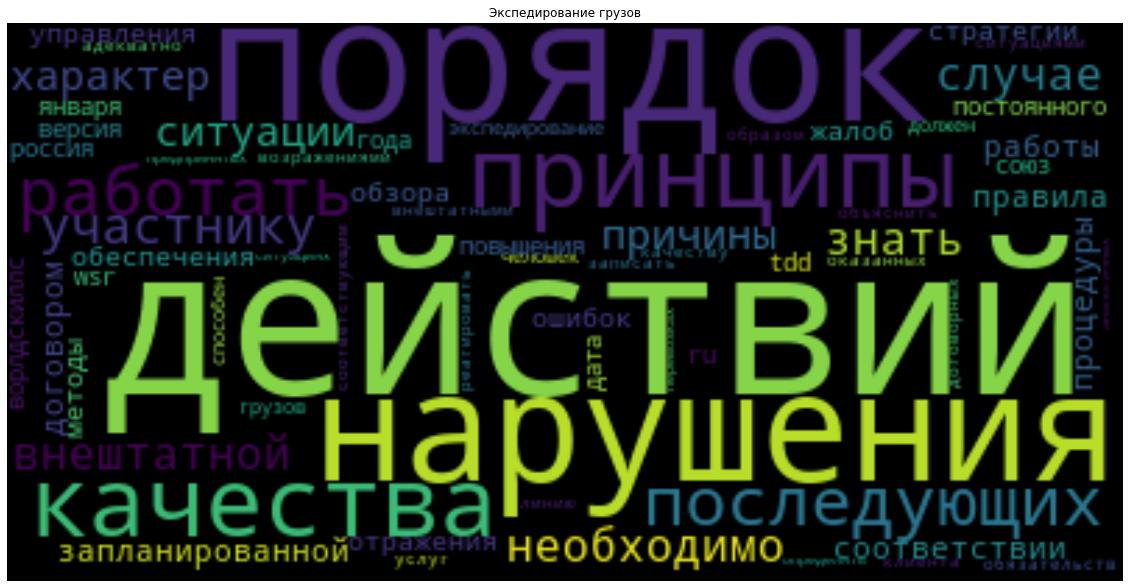

In [23]:
text = df["признаки_раздела_wsss"][0]
plt.figure(figsize = (20, 20))
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df["название_компетенции_wsss"][0])
plt.axis("off")
plt.show()

# Модуль 2

В этом модуле мы продолжаем работать с данными, подготовленными в предыдущем модуле. На основе предобработанных данных необходимо построить и обучить модель классификации, а также добиться наиболее точной работы построенной модели.

## 2.1 Классификация исходных компетенций

In [30]:
X = vect_dict
y = data_anlyz["название_компетенции_wsss"].array

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True)

Выбираем стандартное разделение данных, поскольку данных у нас достаточно

- SVM(Метод опорных векторов)
- RandomForest(Случайный лес)
- NaiveBayes(Классификатор наивного Байеса)

In [33]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [35]:
svc = SVC(C = 5)
svc.fit(X_train, y_train)

SVC(C=5)

## Feature Engineering

In [41]:
df["count_description_len"] = np.nan
df["count_title_len"] = np.nan
df["count_titlefeat_len"] = np.nan

df = df.reset_index()

for row in range(len(df)):
    df["count_description_len"][row] = len(df["описание_компетенции_wsss"][row])
    
for row in range(len(df)):
    df["count_title_len"][row] = len(df["название_раздела_wsss"][row])

for row in range(len(df)):
    df["count_titlefeat_len"][row] = len(df["признаки_раздела_wsss"][row])
    
df["count_description_len"] = df["count_description_len"].astype(int)
df["count_title_len"] = df["count_title_len"].astype(int)
df["count_titlefeat_len"] = df["count_titlefeat_len"].astype(int)

In [43]:
#df = df.drop(columns = ["level_0", "index"], axis = 1)

In [47]:
df

,название_компетенции_wsss,описание_компетенции_wsss,название_раздела_wsss,значимость_раздела_wsss,признаки_раздела_wsss,count_description_len,count_title_len,count_titlefeat_len
0,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Управление внештатными ситуациями,15.0,участнику необходимо знать порядок действий сл...,1758,33,693
1,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Коммерческие сделки,15.0,участнику необходимо знать процедуру документо...,1758,19,471
2,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Калькуляция затрат и цен,15.0,участнику необходимо знать принципы правила це...,1758,24,616
3,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Процесс перевозки,25.0,участнику необходимо знать общие конкретные ва...,1758,17,584
4,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Отношения с клиентом,15.0,участнику необходимо знать правила общения раб...,1758,20,771
...,...,...,...,...,...,...,...,...
955,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Анализ и проектирование,15.0,специалист должен знать понимать важность прин...,1014,24,676
956,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Оптимизация компьютерных игр и приложений,10.0,специалист должен знать понимать особенности о...,1014,41,432
957,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Unity 3D,30.0,специалист должен знать понимать основные прин...,1014,8,265
958,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Программирование на языке С#,27.0,специалист должен знать понимать базовые алгор...,1014,28,291


In [68]:
# Трансформаторы для получения данных
from sklearn.base import BaseEstimator, TransformerMixin
# Конвеер для объединения шагов выполнения классификации
from sklearn.pipeline import Pipeline
# Функция стандартизации числовых значений
from sklearn.preprocessing import StandardScaler
# Функция преобразования текстовых данных под модель
from sklearn.feature_extraction.text import TfidfVectorizer

# Класс необходимый для получения и работы с текстовыми признаками
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.key]
    
# Класс необходимый для получения работы с числовыми признаками
class NumericalSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[[self.key]]

In [85]:
df.head()

,название_компетенции_wsss,описание_компетенции_wsss,название_раздела_wsss,значимость_раздела_wsss,признаки_раздела_wsss,count_description_len,count_title_len,count_titlefeat_len
0,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Управление внештатными ситуациями,15.0,участнику необходимо знать порядок действий сл...,1758,33,693
1,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Коммерческие сделки,15.0,участнику необходимо знать процедуру документо...,1758,19,471
2,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Калькуляция затрат и цен,15.0,участнику необходимо знать принципы правила це...,1758,24,616
3,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Процесс перевозки,25.0,участнику необходимо знать общие конкретные ва...,1758,17,584
4,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Отношения с клиентом,15.0,участнику необходимо знать правила общения раб...,1758,20,771


In [94]:
#описание_компетенции_wsss
dictionary = Pipeline([
    ('selector', TextSelector(key="описание_компетенции_wsss")),
    ('tfidf', TfidfVectorizer(stop_words = stop_words_b))
    ])

dictionary.fit_transform(df).todense()

matrix([[0.        , 0.        , 0.        , ..., 0.07857072, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.07857072, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.07857072, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [95]:
#название_раздела_wsss
title = Pipeline([
    ('selector', TextSelector(key="название_раздела_wsss")),
    ('tfidf', TfidfVectorizer(stop_words = stop_words_b))
    ])

title.fit_transform(df).todense()

matrix([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.8056436],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]])

In [96]:
#значимость_раздела_wsss
ves_title = Pipeline([
    ('selector', NumericalSelector(key="значимость_раздела_wsss")),
    ('tfidf', StandardScaler())
    ])

ves_title.fit_transform(df)

array([[-0.0640027 ],
       [-0.0640027 ],
       [-0.0640027 ],
       [ 0.84289902],
       [-0.0640027 ],
       [-0.0640027 ],
       [ 0.38944816],
       [ 0.38944816],
       [ 1.29634988],
       [-0.0640027 ],
       [-0.97090442],
       [-0.51745356],
       [ 0.38944816],
       [ 0.38944816],
       [ 1.29634988],
       [-0.0640027 ],
       [-0.97090442],
       [-0.51745356],
       [ 0.66151868],
       [ 2.29394178],
       [-0.51745356],
       [-0.60814373],
       [ 0.11737764],
       [-0.51745356],
       [ 0.75220885],
       [-0.51745356],
       [ 1.29634988],
       [-0.51745356],
       [ 0.02668747],
       [-0.51745356],
       [ 4.47050591],
       [-0.69883391],
       [-0.78952408],
       [-0.51745356],
       [-0.24538304],
       [ 0.48013833],
       [ 0.02668747],
       [ 0.11737764],
       [ 1.5684204 ],
       [-0.97090442],
       [ 0.38944816],
       [-0.97090442],
       [ 0.38944816],
       [ 0.84289902],
       [ 0.38944816],
       [-0

In [97]:
#признаки раздела wsss
title_feat = Pipeline([
    ('selector', TextSelector(key="признаки_раздела_wsss")),
    ('tfidf', TfidfVectorizer(stop_words = stop_words_b))
    ])

title_feat.fit_transform(df).todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [98]:
#count_description_len
count_desc = Pipeline([
    ('selector', NumericalSelector(key="count_description_len")),
    ('tfidf', StandardScaler())
    ])

count_desc.fit_transform(df)

array([[-4.42650326e-01],
       [-4.42650326e-01],
       [-4.42650326e-01],
       [-4.42650326e-01],
       [-4.42650326e-01],
       [-4.42650326e-01],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.23410572e+00],
       [-1.23410572e+00],
       [-1.23410572e+00],
       [-1.23410572e+00],
       [-1.23410572e+00],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-4.23440244e-01],
       [-4.23440244e-01],
       [-4.23440244e-01],
       [-4.23440244e-01],
       [-4.23440244e-01],
       [ 7.82610755e-03],
       [ 7.82610755e-03],
       [ 7.82610755e-03],
       [ 7.82610755e-03],
       [ 7.8

In [99]:
#count_title_len
count_title = Pipeline([
    ('selector', NumericalSelector(key="count_title_len")),
    ('tfidf', StandardScaler())
    ])

count_desc.fit_transform(df)

array([[-4.42650326e-01],
       [-4.42650326e-01],
       [-4.42650326e-01],
       [-4.42650326e-01],
       [-4.42650326e-01],
       [-4.42650326e-01],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.23410572e+00],
       [-1.23410572e+00],
       [-1.23410572e+00],
       [-1.23410572e+00],
       [-1.23410572e+00],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-4.23440244e-01],
       [-4.23440244e-01],
       [-4.23440244e-01],
       [-4.23440244e-01],
       [-4.23440244e-01],
       [ 7.82610755e-03],
       [ 7.82610755e-03],
       [ 7.82610755e-03],
       [ 7.82610755e-03],
       [ 7.8

In [100]:
#count_titlefeat_len
count_titlefeat = Pipeline([
    ('selector', NumericalSelector(key="count_titlefeat_len")),
    ('tfidf', StandardScaler())
    ])
count_titlefeat.fit_transform(df)

array([[-2.03405484e-01],
       [-5.60537675e-01],
       [-3.27275658e-01],
       [-3.78754172e-01],
       [-7.79266060e-02],
       [-4.02884726e-01],
       [ 1.85900778e-01],
       [ 2.75988178e-01],
       [ 1.03690496e+00],
       [ 1.23638420e+00],
       [ 2.26118367e-01],
       [ 1.73829972e+00],
       [ 1.85900778e-01],
       [ 2.75988178e-01],
       [ 1.03690496e+00],
       [ 1.23638420e+00],
       [ 2.26118367e-01],
       [ 1.73829972e+00],
       [ 3.33901506e-01],
       [-4.89754718e-01],
       [-1.35784635e-02],
       [ 2.61509846e-01],
       [ 1.01277441e+00],
       [-2.56492701e-01],
       [-7.39103770e-01],
       [ 1.21225365e+00],
       [ 2.77591351e+00],
       [ 2.50248921e-01],
       [-6.10407485e-01],
       [-6.42581557e-01],
       [ 1.29268883e+00],
       [ 1.63051658e+00],
       [ 1.47291893e-01],
       [ 1.42621123e+00],
       [-3.17623437e-01],
       [-4.70450275e-01],
       [ 1.60960343e+00],
       [ 2.37379292e-01],
       [ 3.6

In [102]:
from sklearn.pipeline import FeatureUnion
feat = FeatureUnion([("title", title),
                    ("ves_title", ves_title),
                    ("title_feat", title_feat),
                    ("count_desc", count_desc),
                    ("count_title", count_title),
                    ("count_titlefeat", count_titlefeat)])

y = df["название_компетенции_wsss"]
X = feat.fit_transform(df.drop(columns = ["название_компетенции_wsss"], axis = 1)).todense()

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True)

In [104]:
sc = SVC()
sc.fit(X_train, y_train)

SVC()

In [105]:
sc.score(X_test, y_test)

0.0375